In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Dogecoin and Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [2]:
base = 'https://api.coingecko.com/api/v3/'

In [3]:
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'

In [4]:
result = requests.get(url)
j_bc = result.json()

In [5]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc.head(10)

,time,price
0,1643644927711,37757.493853
1,1643648429387,38338.064993
2,1643652043565,38557.619231
3,1643655748644,38539.651350
4,1643659297858,38510.304162
5,1643662833220,38563.863262
6,1643666483216,38481.198551
7,1643670011982,38494.392527
8,1643673706811,38555.534461
9,1643677220568,38374.494812


In [6]:
url = base + 'coins/dogecoin/market_chart'


In [7]:
param_dict = { 'id':'dogecoin', 'vs_currency':'usd', 'days':30}


In [8]:
result = requests.get(url, params=param_dict)


In [9]:
j_dc = result.json()
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc.head(10)

,time,price
0,1643641301678,0.139308
1,1643644809417,0.140363
2,1643648466591,0.141884
3,1643652009845,0.141798
4,1643655713780,0.141707
5,1643659308420,0.141341
6,1643662849733,0.141669
7,1643666512378,0.141800
8,1643670017950,0.141479
9,1643673711990,0.142175


In [10]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')

In [11]:
df_bc.set_index('time', inplace=True)
df_bc.head(10)

,price
time,
2022-01-31 16:02:07.711,37757.493853
2022-01-31 17:00:29.387,38338.064993
2022-01-31 18:00:43.565,38557.619231
2022-01-31 19:02:28.644,38539.651350
2022-01-31 20:01:37.858,38510.304162
2022-01-31 21:00:33.220,38563.863262
2022-01-31 22:01:23.216,38481.198551
2022-01-31 23:00:11.982,38494.392527
2022-02-01 00:01:46.811,38555.534461


In [12]:
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')

df_dc.set_index('time', inplace=True)
df_dc.head(10)

,price
time,
2022-01-31 15:01:41.678,0.139308
2022-01-31 16:00:09.417,0.140363
2022-01-31 17:01:06.591,0.141884
2022-01-31 18:00:09.845,0.141798
2022-01-31 19:01:53.780,0.141707
2022-01-31 20:01:48.420,0.141341
2022-01-31 21:00:49.733,0.141669
2022-01-31 22:01:52.378,0.141800
2022-01-31 23:00:17.950,0.141479


<AxesSubplot:xlabel='time'>

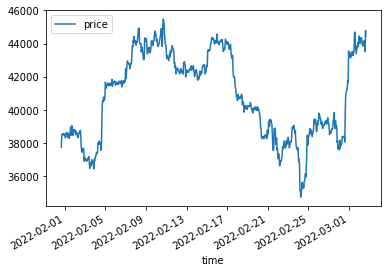

In [13]:
df_bc.plot()

<AxesSubplot:xlabel='time'>

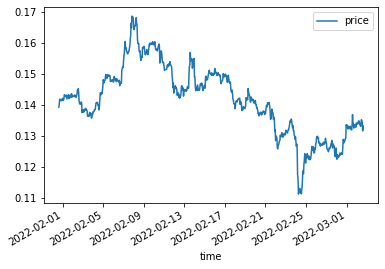

In [14]:
df_dc.plot()

# top ten coins report

In [18]:
url = base + 'coins/markets?vs_currency=usd&order=market_cap_desc'

In [20]:
result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,44479.000,848882386724,1,9.395990e+11,2.629252e+10,44969.000,...,2.100000e+07,21000000.0,69045.00,-35.63844,2021-11-10T14:24:11.849Z,67.810000,6.543450e+04,2013-07-06T00:00:00.000Z,None,2022-03-02T15:24:59.565Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2982.990,361024821711,2,NaN,1.812994e+10,3029.470,...,NaN,NaN,4878.26,-38.90934,2021-11-10T14:24:19.604Z,0.432979,6.881926e+05,2015-10-20T00:00:00.000Z,"{'times': 88.58516784358585, 'currency': 'btc'...",2022-03-02T15:23:41.165Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.005,79620784551,3,NaN,5.668192e+10,1.007,...,7.944206e+10,NaN,1.32,-24.20964,2018-07-24T00:00:00.000Z,0.572521,7.515142e+01,2015-03-02T00:00:00.000Z,None,2022-03-02T15:21:22.505Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,411.650,69834085880,4,6.983409e+10,1.942343e+09,415.010,...,1.681370e+08,168137035.9,686.31,-40.07710,2021-05-10T07:24:17.097Z,0.039818,1.032744e+06,2017-10-19T00:00:00.000Z,None,2022-03-02T15:24:05.031Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.008,53828949383,5,NaN,4.302109e+09,1.007,...,5.361842e+10,NaN,1.17,-14.06450,2019-05-08T00:40:28.300Z,0.891848,1.299806e+01,2021-05-19T13:14:05.611Z,None,2022-03-02T15:24:17.926Z


In [21]:
data_df = df_list.iloc[:10, 0]
data_df

0        bitcoin
1       ethereum
2         tether
3    binancecoin
4       usd-coin
5         ripple
6     terra-luna
7         solana
8        cardano
9    avalanche-2
Name: id, dtype: object

In [22]:
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_report = pd.concat(data_list)
data_report

,date_time,price,file_name
0,1620345600000,56507.759440,bitcoin
1,1620432000000,57361.569043,bitcoin
2,1620518400000,58771.881690,bitcoin
3,1620604800000,58213.926294,bitcoin
4,1620691200000,55901.667595,bitcoin
...,...,...,...
296,1645920000000,81.633155,avalanche-2
297,1646006400000,74.943551,avalanche-2
298,1646092800000,84.351363,avalanche-2
299,1646179200000,86.838744,avalanche-2


In [23]:
data_report = data_report.set_index('date_time')

data_report.head()

,price,file_name
date_time,,
1620345600000,56507.759440,bitcoin
1620432000000,57361.569043,bitcoin
1620518400000,58771.881690,bitcoin
1620604800000,58213.926294,bitcoin
1620691200000,55901.667595,bitcoin


In [24]:
data_report.to_csv('top_ten_report.csv')

In [25]:
check = pd.read_csv('top_ten_report.csv')
check

,date_time,price,file_name
0,1620345600000,56507.759440,bitcoin
1,1620432000000,57361.569043,bitcoin
2,1620518400000,58771.881690,bitcoin
3,1620604800000,58213.926294,bitcoin
4,1620691200000,55901.667595,bitcoin
...,...,...,...
3005,1645920000000,81.633155,avalanche-2
3006,1646006400000,74.943551,avalanche-2
3007,1646092800000,84.351363,avalanche-2
3008,1646179200000,86.838744,avalanche-2
